In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the data
file_path = r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 5_US Supreme Court Data\database.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

    case_id    docket_id       issues_id            vote_id date_decision  \
0  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01    11/18/1946   
1  1946-002  1946-002-01  1946-002-01-01  1946-002-01-01-01    11/18/1946   
2  1946-003  1946-003-01  1946-003-01-01  1946-003-01-01-01    11/18/1946   
3  1946-004  1946-004-01  1946-004-01-01  1946-004-01-01-01    11/25/1946   
4  1946-005  1946-005-01  1946-005-01-01  1946-005-01-01-01    11/25/1946   

   decision_type  us_citation court_citation  led_citation  \
0              1   329 U.S. 1    67 S. Ct. 6   91 L. Ed. 3   
1              1  329 U.S. 14   67 S. Ct. 13  91 L. Ed. 12   
2              1  329 U.S. 29    67 S. Ct. 1  91 L. Ed. 22   
3              7  329 U.S. 40  67 S. Ct. 167  91 L. Ed. 29   
4              1  329 U.S. 64  67 S. Ct. 154  91 L. Ed. 44   

         lexis_citation  ...  authority_decision_two  law_type law_supplement  \
0  1946 U.S. LEXIS 1724  ...                     NaN       6.0          600.0   
1 

In [23]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 us_citation                         366
court_citation                       26
led_citation                          4
docket                                8
date_argument                      1016
date_reargument                    8561
petitioner                            3
petitioner_state                   6954
respondent                            2
respondent_state                   6282
jurisdiction                          1
administrative_action              6293
administrative_action_state        8074
district_court                       10
case_origin                         428
case_origin_state                  6321
case_source                         210
case_source_state                  6635
lower_court_disagreement              7
cert_reason                          91
lower_court_disposition            1283
lower_disposition_direction         198
declaration_unconstitutionality       1
case_disposition                    130
disposition_unusual    

In [24]:
# Data Cleaning Strategy
# Drop columns with excessive missing values (e.g., > 50% missing)
threshold = len(data) * 0.5
data_cleaned = data.dropna(axis=1, thresh=threshold).copy()  # Make a copy here

# Filling missing values based on data types and context
# 1. Categorical columns: fill with mode or mark as 'Unknown'
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data_cleaned[col].isnull().sum() > 0:
        if data_cleaned[col].nunique() < 10:  # If there are few unique categories
            mode_value = data_cleaned[col].mode()[0]
            data_cleaned[col].fillna(mode_value, inplace=True)
        else:
            data_cleaned[col].fillna('Unknown', inplace=True)

# 2. Numerical columns: fill with mean
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if data_cleaned[col].isnull().sum() > 0:
        mean_value = data_cleaned[col].mean()
        data_cleaned[col].fillna(mean_value, inplace=True)

# 3. Specific handling for certain columns based on context
# Example: If 'date_argument' is missing, you might want to fill it with a specific date or leave it as is
if 'date_argument' in data_cleaned.columns:
    data_cleaned['date_argument'].fillna('Unknown Date', inplace=True)

# 4. Drop any remaining columns that are still mostly empty
data_cleaned.dropna(axis=1, how='any', inplace=True)

In [25]:
# Verify that missing values have been handled
missing_values_after = data_cleaned.isnull().sum()
print("Missing Values After Cleaning:\n", missing_values_after[missing_values_after > 0])

Missing Values After Cleaning:
 Series([], dtype: int64)


In [26]:
# Exploratory Data Analysis (EDA)
# Step 1: Basic statistics
print("\nBasic Statistics:\n", data_cleaned.describe(include='all'))



Basic Statistics:
          case_id    docket_id       issues_id            vote_id  \
count       8737         8737            8737               8737   
unique      8737         8737            8737               8737   
top     1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01   
freq           1            1               1                  1   
mean         NaN          NaN             NaN                NaN   
std          NaN          NaN             NaN                NaN   
min          NaN          NaN             NaN                NaN   
25%          NaN          NaN             NaN                NaN   
50%          NaN          NaN             NaN                NaN   
75%          NaN          NaN             NaN                NaN   
max          NaN          NaN             NaN                NaN   

       date_decision  decision_type us_citation court_citation led_citation  \
count           8737    8737.000000        8737           8737         8737   
uniqu


Cases by Year:
 year
1946     25
1947    135
1948    118
1949    134
1950     97
       ... 
2012     76
2013     84
2014     69
2015     69
2016     75
Name: count, Length: 71, dtype: int64


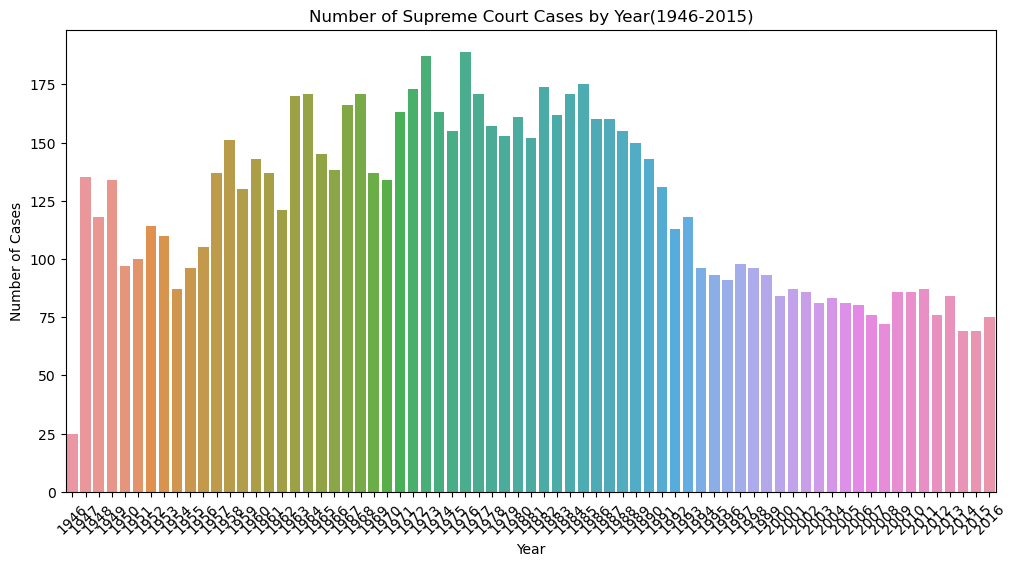

In [27]:
# Step 3: Count of cases by year
if 'date_decision' in data_cleaned.columns:
    data_cleaned['year'] = pd.to_datetime(data_cleaned['date_decision']).dt.year
    cases_by_year = data_cleaned['year'].value_counts().sort_index()
    print("\nCases by Year:\n", cases_by_year)

    # Plot cases by year
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='year', order=cases_by_year.index)
plt.title('Number of Supreme Court Cases by Year(1946-2015)')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.show()


Cases by Year:
 year
1946     25
1947    135
1948    118
1949    134
1950     97
       ... 
2012     76
2013     84
2014     69
2015     69
2016     75
Name: count, Length: 71, dtype: int64


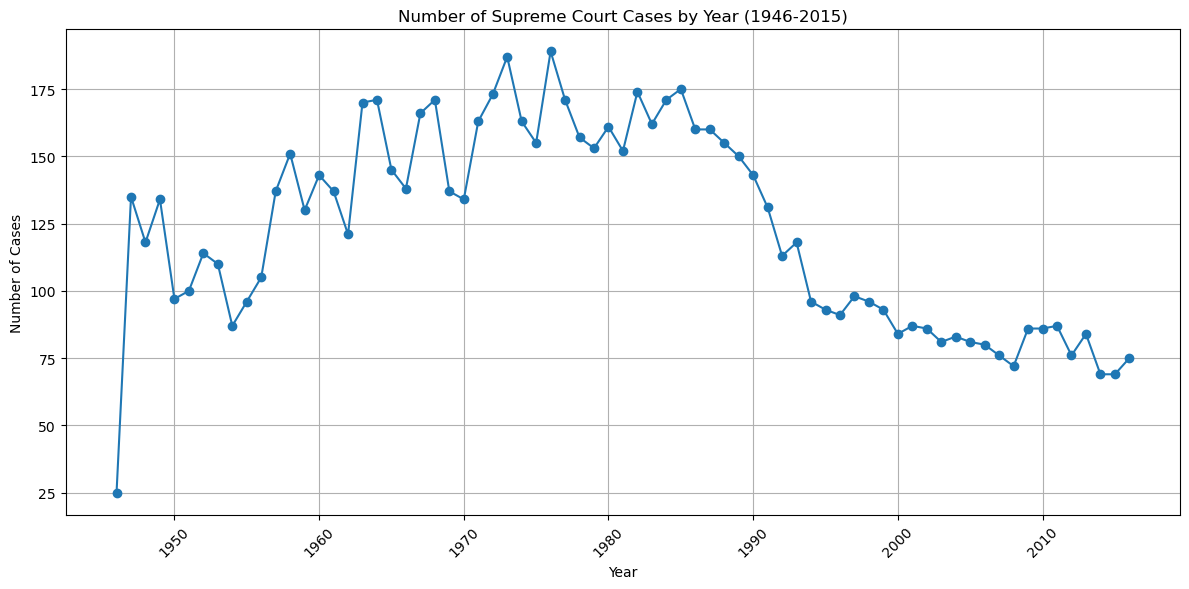

In [28]:
# Step 3: Count of cases by year
if 'date_decision' in data_cleaned.columns:
    data_cleaned['year'] = pd.to_datetime(data_cleaned['date_decision']).dt.year
    cases_by_year = data_cleaned['year'].value_counts().sort_index()
    print("\nCases by Year:\n", cases_by_year)

# Plot cases by year as a line graph
plt.figure(figsize=(12, 6))
plt.plot(cases_by_year.index, cases_by_year.values, marker='o')
plt.title('Number of Supreme Court Cases by Year (1946-2015)')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.grid()
plt.tight_layout()
plt.show()


Most Common Case Names:
 case_name
UNITED STATES v. CALIFORNIA                                    8
UNITED STATES v. LOUISIANA et al. (LOUISIANA BOUNDARY CASE)    7
ARIZONA v. CALIFORNIA et al.                                   6
JOHNSON v. UNITED STATES                                       5
UNITED STATES v. LOUISIANA et al.                              5
UTAH v. UNITED STATES                                          5
JONES v. UNITED STATES                                         4
SMITH v. UNITED STATES                                         4
HARRIS v. UNITED STATES                                        4
TEXAS v. LOUISIANA                                             3
Name: count, dtype: int64


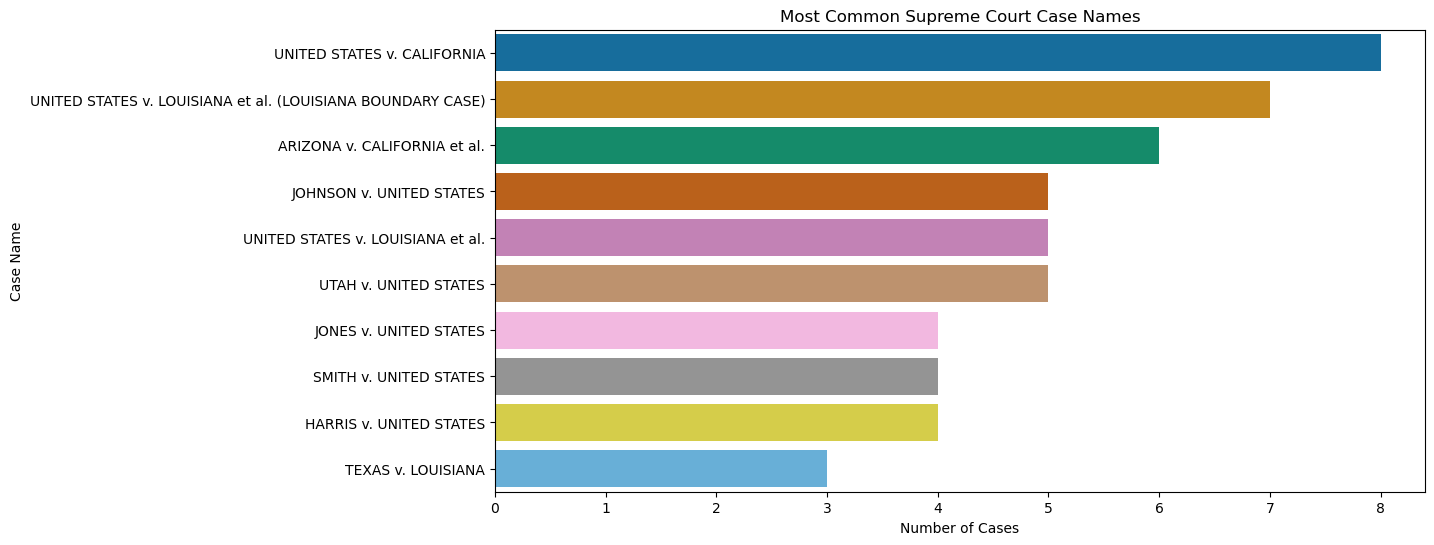

In [85]:
# Step 4: Most common case types
if 'case_name' in data_cleaned.columns:
    common_case_types = data_cleaned['case_name'].value_counts().head(10)
    print("\nMost Common Case Names:\n", common_case_types)

    # Plot most common case names with custom colors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=common_case_types.values, y=common_case_types.index, palette='colorblind')  # Change 'plasma' to your preferred palette
    plt.title('Most Common Supreme Court Case Names')
    plt.xlabel('Number of Cases')
    plt.ylabel('Case Name')
    plt.show()

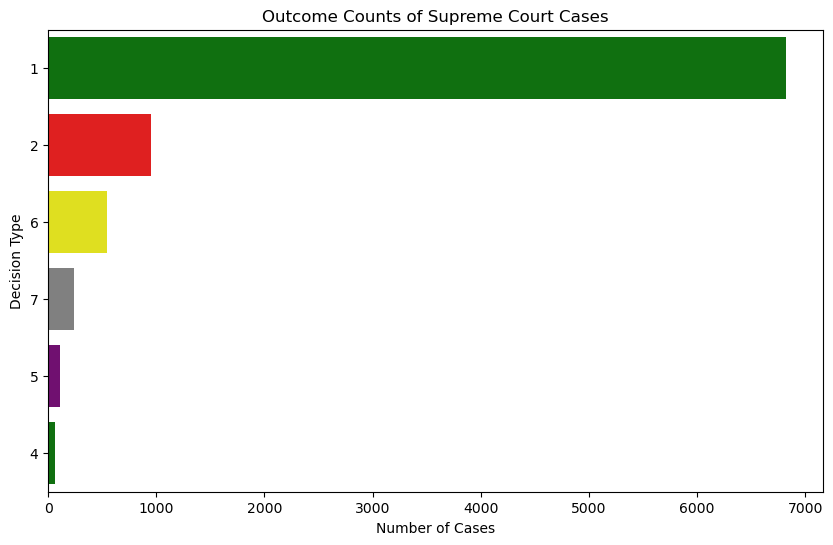

In [78]:
# Custom color list example
custom_colors = ['green', 'red', 'yellow', 'grey', 'purple']

# Plot outcome counts with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='decision_type', order=outcome_counts.index, palette=custom_colors)
plt.title('Outcome Counts of Supreme Court Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Decision Type')
plt.show()


Most Common Chief Justices:
 chief_justice
Burger       2807
Warren       2205
Rehnquist    2040
Roberts       873
Vinson        812
Name: count, dtype: int64


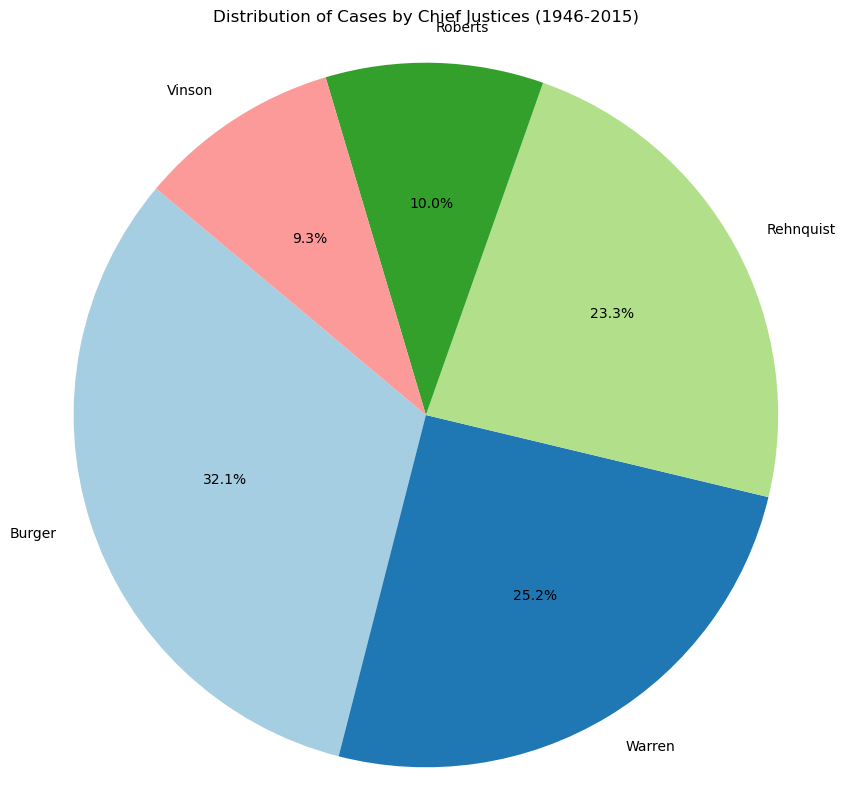

In [39]:
# Step 6: Analyze cases by Chief Justice
if 'chief_justice' in data_cleaned.columns:
    chief_justice_counts = data_cleaned['chief_justice'].value_counts().head(10)
    print("\nMost Common Chief Justices:\n", chief_justice_counts)

    # Plot Chief Justices using matplotlib (pie chart)
plt.figure(figsize=(10, 10))
plt.pie(chief_justice_counts.values, labels=chief_justice_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cases by Chief Justices (1946-2015)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Jurisdiction Counts:
 jurisdiction
1.000000     7034
2.000000     1479
9.000000      157
6.000000       21
8.000000       19
4.000000        8
12.000000       7
5.000000        5
14.000000       2
7.000000        2
15.000000       1
36.000000       1
1.364125        1
Name: count, dtype: int64


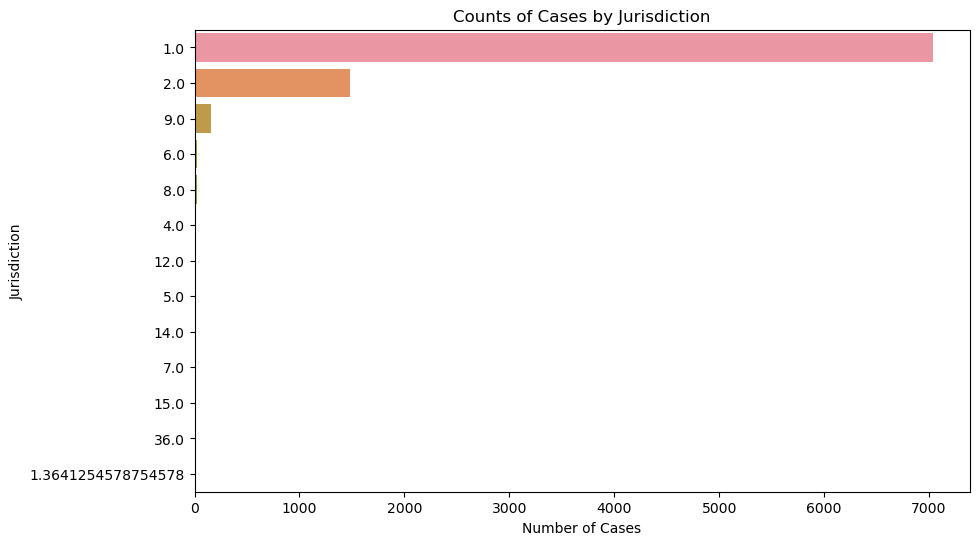

In [40]:
# Step 7: Analyze jurisdiction types
if 'jurisdiction' in data_cleaned.columns:
    jurisdiction_counts = data_cleaned['jurisdiction'].value_counts()
    print("\nJurisdiction Counts:\n", jurisdiction_counts)

# Plot jurisdiction types
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='jurisdiction', order=jurisdiction_counts.index)
plt.title('Counts of Cases by Jurisdiction')
plt.xlabel('Number of Cases')
plt.ylabel('Jurisdiction')
plt.show()


Most Common Issue Areas:
 issue_area
1.0     1974
8.0     1696
2.0     1414
9.0     1192
3.0      670
10.0     400
7.0      356
4.0      338
12.0     310
5.0      113
Name: count, dtype: int64


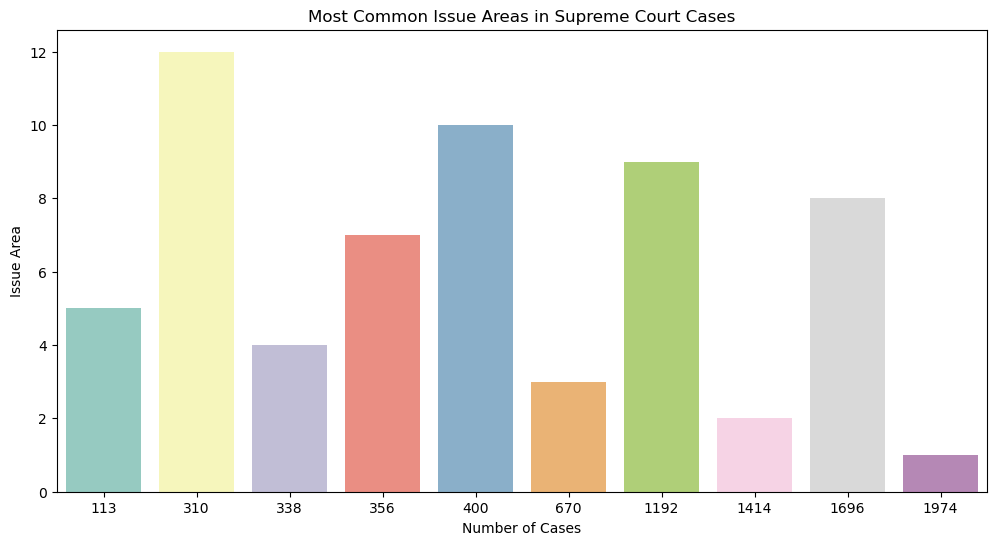

In [74]:
# Step 8: Analyze issue areas
if 'issue_area' in data_cleaned.columns:
    issue_area_counts = data_cleaned['issue_area'].value_counts().head(10)
    print("\nMost Common Issue Areas:\n", issue_area_counts)

    # Plot issue areas with custom colors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=issue_area_counts.values, y=issue_area_counts.index, palette='Set3')  # Change 'coolwarm' to your preferred palette
    plt.title('Most Common Issue Areas in Supreme Court Cases')
    plt.xlabel('Number of Cases')
    plt.ylabel('Issue Area')
    plt.show()


Decision Direction Counts:
 decision_direction
2.000000     4398
1.000000     4167
3.000000      140
1.538479       31
11.000000       1
Name: count, dtype: int64


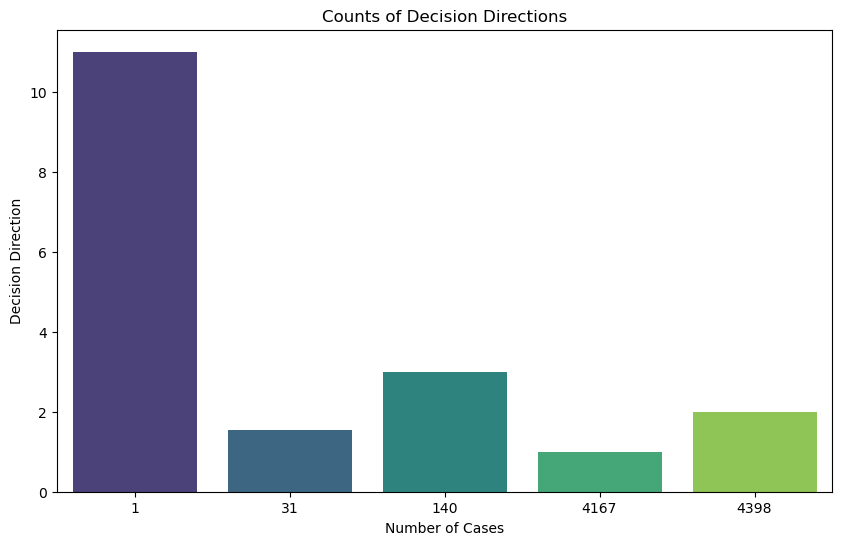

In [71]:
# Step 9: Analyze decision directions (majority vs. dissent)
if 'decision_direction' in data_cleaned.columns:
    decision_direction_counts = data_cleaned['decision_direction'].value_counts()
    print("\nDecision Direction Counts:\n", decision_direction_counts)

    

# Plot decision directions as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=decision_direction_counts.values, y=decision_direction_counts.index, palette='viridis')  # Change 'viridis' to your preferred palette
plt.title('Counts of Decision Directions')
plt.xlabel('Number of Cases')
plt.ylabel('Decision Direction')
plt.show()


Case Origin Counts:
 case_origin
302.000000    1839
96.000000      438
128.678541     428
55.000000      419
66.000000      304
50.000000      217
48.000000      213
109.000000     151
51.000000      134
32.000000      131
Name: count, dtype: int64


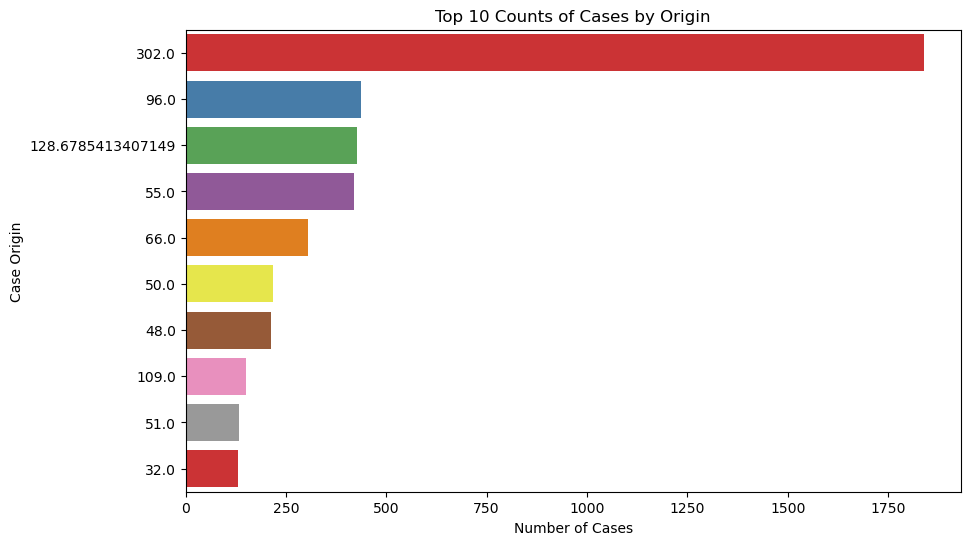

In [66]:
# Step 12: Analyze case origins
if 'case_origin' in data_cleaned.columns:
    case_origin_counts = data_cleaned['case_origin'].value_counts().head(10)
    print("\nCase Origin Counts:\n", case_origin_counts)

    # Plot case origins with custom colors
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data_cleaned, y='case_origin', order=case_origin_counts.index, palette='Set1')  # Change 'pastel' to your preferred palette
    plt.title('Top 10 Counts of Cases by Origin')
    plt.xlabel('Number of Cases')
    plt.ylabel('Case Origin')
    plt.show()


Case Disposition Counts:
 case_disposition
2.000000     2615
4.000000     2328
3.000000     1964
5.000000     1029
9.000000      342
7.000000      160
3.564076      130
6.000000       75
1.000000       47
8.000000       34
10.000000      13
Name: count, dtype: int64


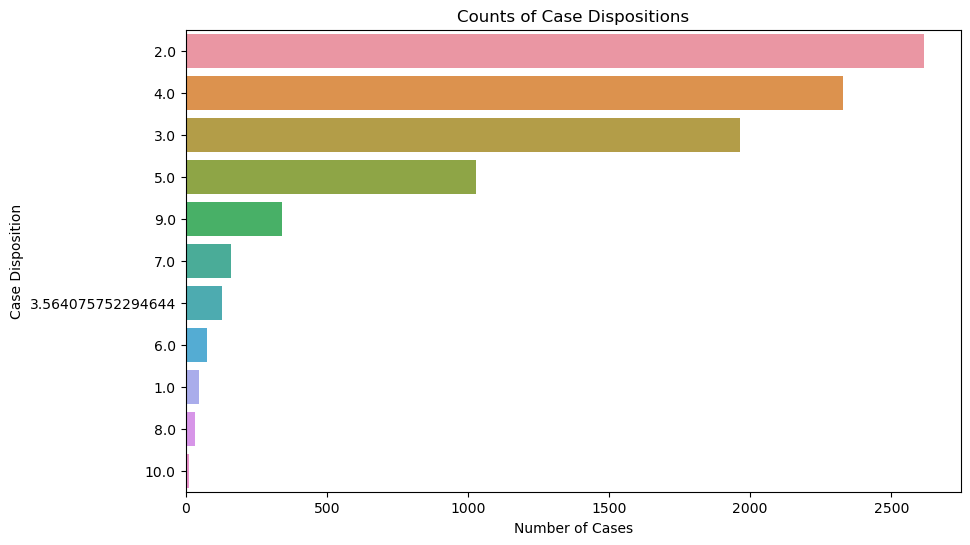

In [49]:
# Step 13: Analyze dispositions
if 'case_disposition' in data_cleaned.columns:
    disposition_counts = data_cleaned['case_disposition'].value_counts()
    print("\nCase Disposition Counts:\n", disposition_counts)

    # Plot case dispositions
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='case_disposition', order=disposition_counts.index)
plt.title('Counts of Case Dispositions')
plt.xlabel('Number of Cases')
plt.ylabel('Case Disposition')
plt.show()


Dissenting Opinion Counts:
 decision_direction_dissent
0.000000    8614
1.000000      75
0.008976      47
3.000000       1
Name: count, dtype: int64


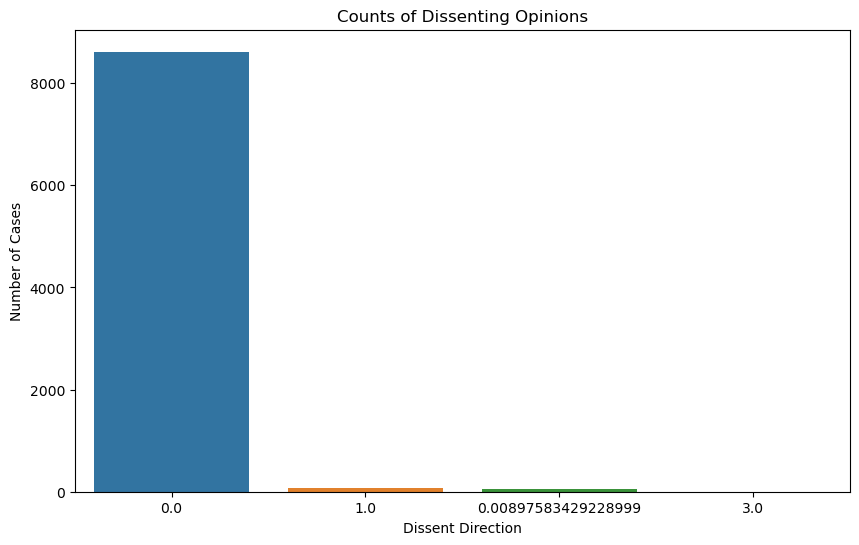

In [53]:
# Step 15: Analyze dissenting opinions
if 'decision_direction_dissent' in data_cleaned.columns:
    dissent_counts = data_cleaned['decision_direction_dissent'].value_counts()
    print("\nDissenting Opinion Counts:\n", dissent_counts)

    # Plot dissenting opinions
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='decision_direction_dissent', order=dissent_counts.index)
plt.title('Counts of Dissenting Opinions')
plt.xlabel('Dissent Direction')
plt.ylabel('Number of Cases')
plt.show()


Most Common Majority Opinion Writers:
 majority_opinion_writer
Unknown    1678
95          474
102         455
92          454
103         397
81          368
98          322
94          314
100         314
78          311
Name: count, dtype: int64


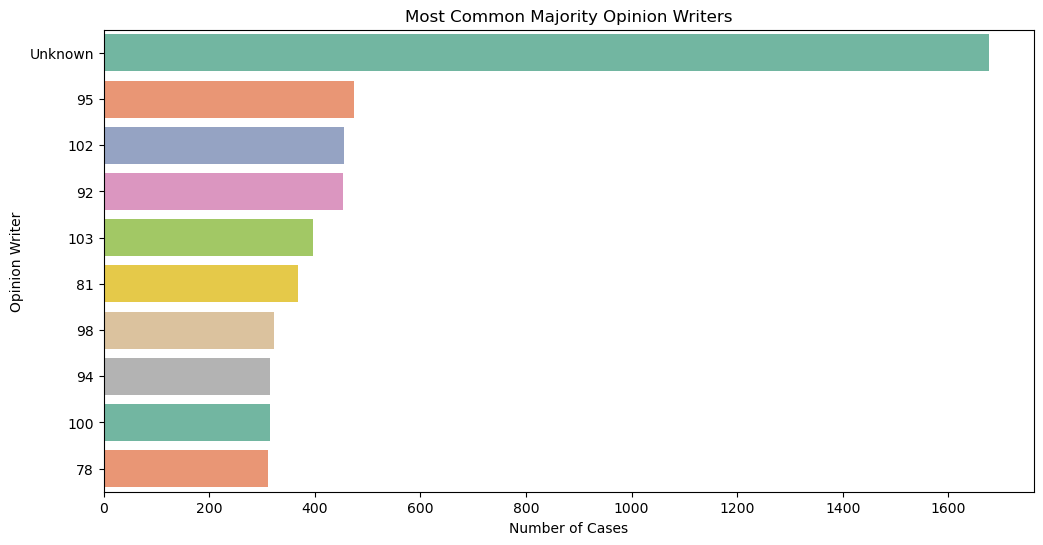

In [62]:
# Step 16: Analyze the role of majority opinion writers
if 'majority_opinion_writer' in data_cleaned.columns:
    opinion_writer_counts = data_cleaned['majority_opinion_writer'].value_counts().head(10)
    print("\nMost Common Majority Opinion Writers:\n", opinion_writer_counts)

    # Plot majority opinion writers with custom colors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=opinion_writer_counts.values, y=opinion_writer_counts.index, palette='Set2')  # Change 'Set2' to your preferred palette
    plt.title('Most Common Majority Opinion Writers')
    plt.xlabel('Number of Cases')
    plt.ylabel('Opinion Writer')
    plt.show()


Most Common US Citations:
 us_citation
Unknown          366
347 U.S. 909       3
399 U.S. 520       2
352 U.S. 862       2
348 U.S. 933       2
348 U.S. 940       2
348 U.S. 956       2
348 U.S. 978       2
352 U.S. 1027      2
352 U.S. 1020      2
Name: count, dtype: int64


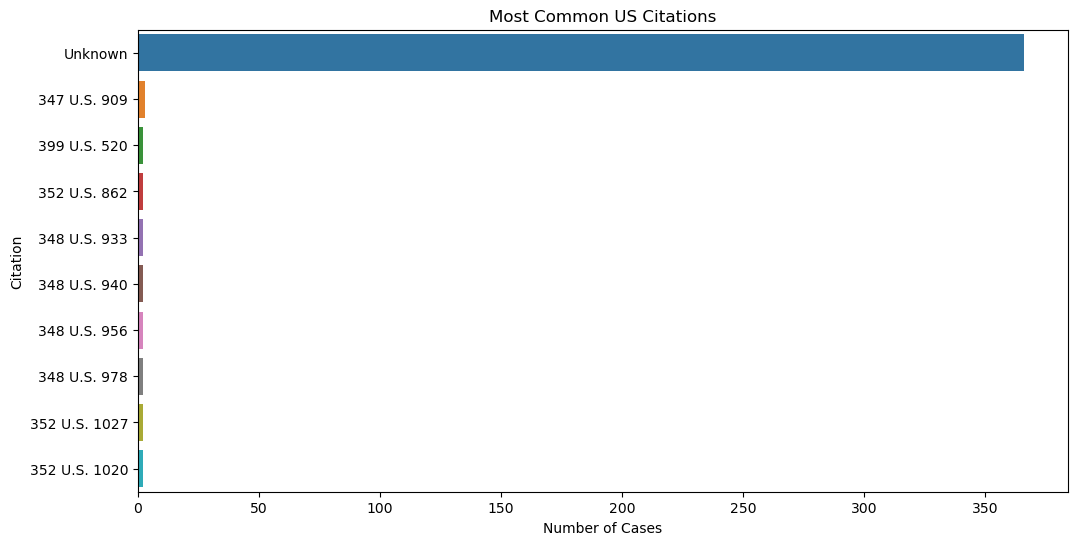

In [55]:
# Step 17: Analyze citation patterns
if 'us_citation' in data_cleaned.columns:
    citation_counts = data_cleaned['us_citation'].value_counts().head(10)
    print("\nMost Common US Citations:\n", citation_counts)

    # Plot US citations
plt.figure(figsize=(12, 6))
sns.barplot(x=citation_counts.values, y=citation_counts.index)
plt.title('Most Common US Citations')
plt.xlabel('Number of Cases')
plt.ylabel('Citation')
plt.show()


Distribution of Law Types:
 law_type
3.000000    2676
2.000000    2274
6.000000    1469
3.323584    1249
1.000000     433
5.000000     298
4.000000     292
9.000000      38
8.000000       8
Name: count, dtype: int64


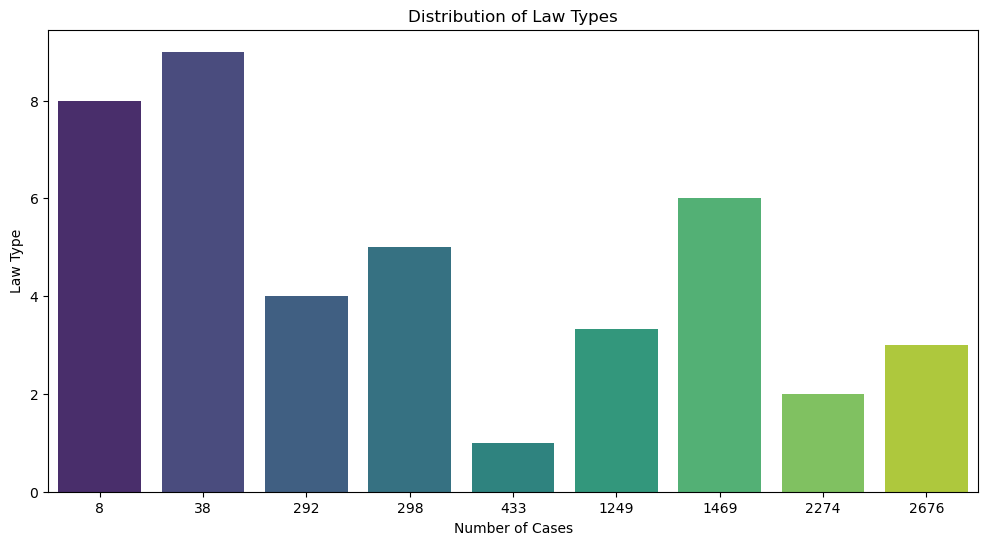

In [61]:
# Step 1: Check the distribution of law types
if 'law_type' in data_cleaned.columns:
    law_type_counts = data_cleaned['law_type'].value_counts()
    print("\nDistribution of Law Types:\n", law_type_counts)

    # Plot distribution of law types with custom colors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=law_type_counts.values, y=law_type_counts.index, palette='viridis')  # Change 'viridis' to your preferred palette
    plt.title('Distribution of Law Types')
    plt.xlabel('Number of Cases')
    plt.ylabel('Law Type')
    plt.show()

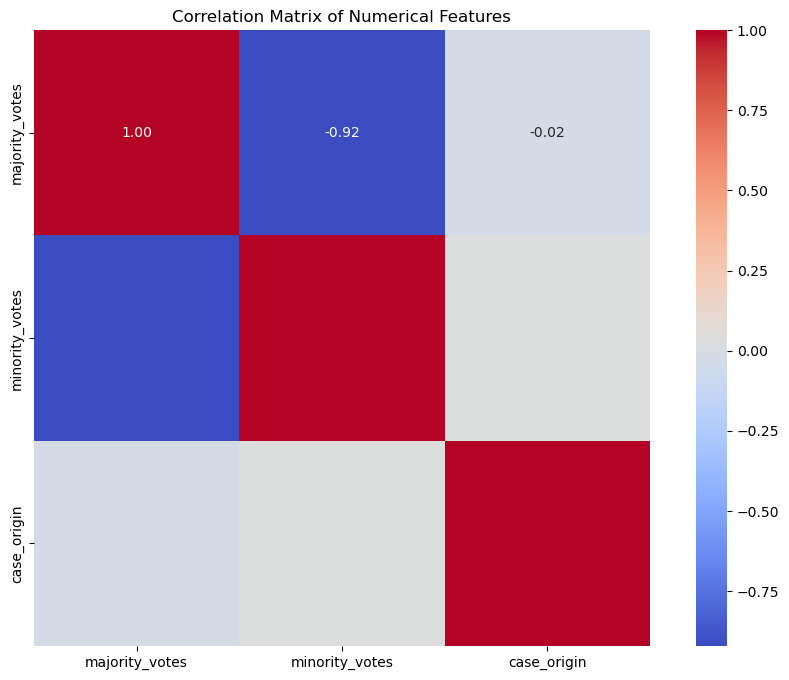

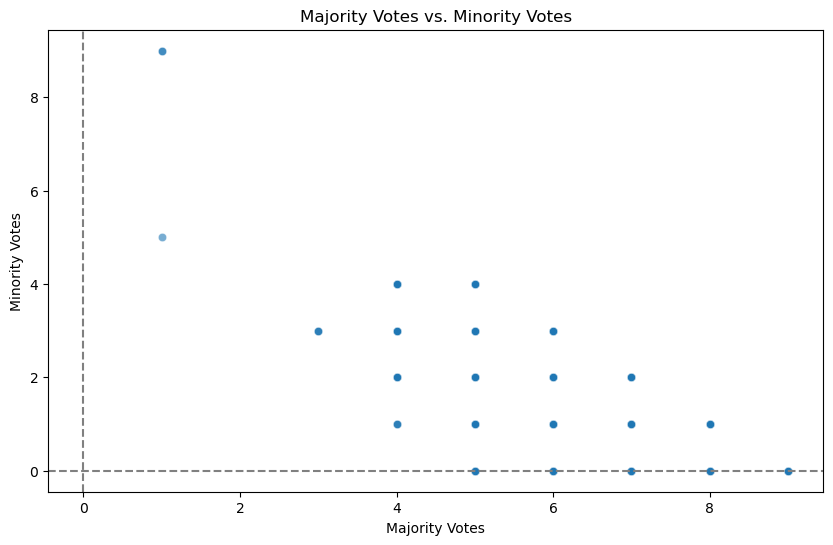

In [57]:
numerical_cols = [
    'majority_votes', 
    'minority_votes', 
    'case_origin',  # Adjust based on what is numerical in your context
      # Example numerical column
    # Add more numerical columns as needed
]

# Step 2: Compute the correlation matrix
correlation_matrix = data_cleaned[numerical_cols].corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 4: Further analyze specific correlations
# Example: Correlation between majority and minority votes
if 'majority_votes' in data_cleaned.columns and 'minority_votes' in data_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data_cleaned, x='majority_votes', y='minority_votes', alpha=0.6)
    plt.title('Majority Votes vs. Minority Votes')
    plt.xlabel('Majority Votes')
    plt.ylabel('Minority Votes')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.show()